In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('D:/Notebook/DataScienceAlgorithms/Logistic Regression/DataForLogistic.csv')

In [3]:
df.head()

,id,name,age,experience,education,income(in lakhs),loan
0,1,virat,76,10,twelth,33,1
1,2,vijay,32,7,tenth,32,1
2,3,ms dhoni,32,6,grauduate,37,1
3,4,pujara,34,6,doctorate,29,1
4,5,pant,34,6,tenth,23,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
id                  33 non-null int64
name                33 non-null object
age                 33 non-null int64
experience          33 non-null int64
education           33 non-null object
income(in lakhs)    33 non-null int64
loan                33 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.9+ KB


In [5]:
df.shape

(33, 7)

In [6]:
df.describe()

,id,age,experience,income(in lakhs),loan
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,16.333333,32.121212,4.606061,26.121212,0.515152
std,9.282600,11.757332,1.951592,6.650928,0.507519
min,1.000000,9.000000,1.000000,9.000000,0.000000
25%,9.000000,26.000000,3.000000,23.000000,0.000000
50%,16.000000,32.000000,5.000000,26.000000,1.000000
75%,24.000000,35.000000,6.000000,30.000000,1.000000
max,32.000000,76.000000,10.000000,43.000000,1.000000


In [7]:
df['loan'].value_counts()

1    17
0    16
Name: loan, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
%matplotlib inline

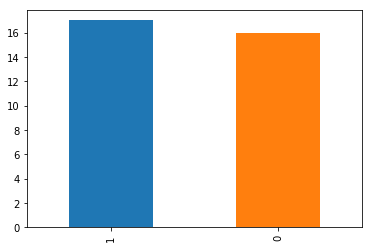

In [10]:
df['loan'].value_counts().plot(kind='bar')

In [11]:
df.corr()

,id,age,experience,income(in lakhs),loan
id,1.000000,-0.157865,-0.247826,-0.410168,-0.103921
age,-0.157865,1.000000,0.858795,0.520525,0.266773
experience,-0.247826,0.858795,1.000000,0.547904,0.242844
income(in lakhs),-0.410168,0.520525,0.547904,1.000000,0.397531
loan,-0.103921,0.266773,0.242844,0.397531,1.000000


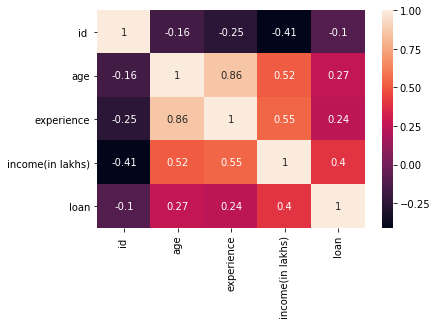

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
from sklearn.linear_model import LogisticRegression
from pandas.api.types import CategoricalDtype 

In [14]:
df.columns

Index(['id ', 'name ', 'age', 'experience', 'education', 'income(in lakhs)',
       'loan'],
      dtype='object')

In [15]:
labels, uniques = pd.factorize(df['education'])

In [18]:
labels,uniques

(array([0, 1, 2, 3, 1, 2, 2, 1, 2, 3, 1, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 2,
        2, 2, 3, 3, 0, 1, 2, 2, 0, 0, 2], dtype=int64),
 Index(['twelth', 'tenth', 'grauduate', 'doctorate'], dtype='object'))

In [19]:
x = df.loc[:,['age', 'income(in lakhs)','experience', 'education']]
y = df.loan

In [21]:
x.head()

,age,income(in lakhs),experience,education
0,76,33,10,twelth
1,32,32,7,tenth
2,32,37,6,grauduate
3,34,29,6,doctorate
4,34,23,6,tenth


In [96]:
classifier = LogisticRegression()

In [97]:
modelFit = classifier.fit(x,y)

C:\Users\skksh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'grauduate'

In [20]:
modelFit.score(x,y)

0.6190476190476191

In [21]:
score = modelFit.score(x,y)

In [22]:
print(score)

0.6190476190476191


In [52]:
x_test=pd.DataFrame({"income":[28,27,40,26,23,23,23,23,27,43,11],"age":[23,34,28,23,26,21,24,27,21,45,23]})

In [53]:
modelFit.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [31]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
df1=df[['age', 'income(in lakhs)', 'loan']]

In [34]:
d=df1

In [35]:
pd.Series([variance_inflation_factor(d.values,i) for i in range(d.shape[1])],index=d.columns)

age                 6.646520
income(in lakhs)    8.225065
loan                2.385610
dtype: float64

## VIF should not be greater than 5, sometimes it's ok. Maximum range is 10 of VIF

In [36]:
d.shape

(21, 3)

In [37]:
variance_inflation_factor(d.values,0)

6.646520321414185

In [38]:
d.values

array([[76, 33,  1],
       [32, 32,  1],
       [12, 37,  1],
       [34, 29,  1],
       [34, 23,  0],
       [21, 27,  0],
       [23, 30,  1],
       [23, 24,  0],
       [40, 28,  0],
       [35, 31,  1],
       [ 9, 23,  0],
       [27, 23,  0],
       [26, 25,  1],
       [44, 28,  1],
       [33, 26,  1],
       [22, 31,  1],
       [33, 32,  1],
       [45, 43,  0],
       [34, 23,  0],
       [32, 12,  0],
       [45, 32,  0]], dtype=int64)